In [ ]:
from PIL import Image
import numpy as np
from numpy.random import random_sample, choice
import colorsys
import matplotlib.pyplot as plt

In [ ]:
def load_image(filename):
    image = Image.open(filename)
    return image

In [ ]:
image = load_image('parrots.jpg')

In [5]:
image.size

(1920, 1279)

In [15]:
def thumbnail(image, max_dimension = 100):
    size = np.array(image.size)
    normalized_size = size / max(size)
    new_size = (normalized_size * max_dimension).round().astype(int)
    return image.resize(new_size, resample = Image.BICUBIC)

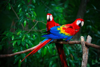

In [18]:
thumb = thumbnail(image)
thumb

In [19]:
np.array(thumb).shape

(67, 100, 3)

In [22]:
def colors (image):
    pixels = np.array(image) / 255
    return pixels.reshape(-1, 3)

In [23]:
cols = colors(thumb)
cols[0]

array([0.00784314, 0.04313725, 0.02352941])

In [24]:
cols.shape

(6700, 3)

In [49]:
def to_image (array):
    pixels = (np.array(array) * 255).round().astype(np.uint8)
    return Image.fromarray(pixels)

In [ ]:
def swatches (colors, bucket_size = 20):
    image = to_image(colors[np.newaxis, ...])
    full_size = np.array(image.size) * bucket_size
    return image.resize(full_size)

In [60]:
def hsv_sorted (colors):
    to_hsv = lambda triple: colorsys.rgb_to_hsv(*triple)
    hsv = np.apply_along_axis(to_hsv, 1, colors)
    order = np.lexsort(hsv.T[::-1])
    return colors[order]

In [70]:
swatches(hsv_sorted(cols[choice(len(cols), 40)]))

<Figure size 432x432 with 0 Axes>

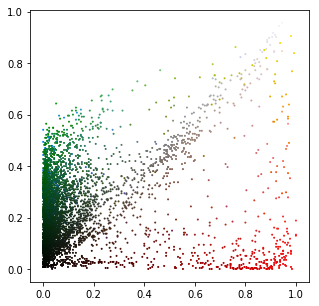

In [84]:
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(1,1,1)
ax.scatter(cols[:,0],cols[:,1], s = 1, c = cols)
plt.show()

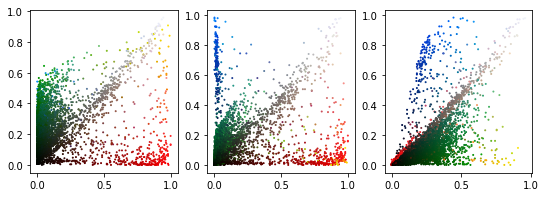

In [91]:
fig = plt.figure(figsize=(9,3))
ax = fig.add_subplot(1,3,1)
ax.scatter(cols[:,0],cols[:,1], s = 1, c = cols)
ax = fig.add_subplot(1,3,2)
ax.scatter(cols[:,0],cols[:,2], s = 1, c = cols)
ax = fig.add_subplot(1,3,3)
ax.scatter(cols[:,1],cols[:,2], s = 1, c = cols)
plt.show()

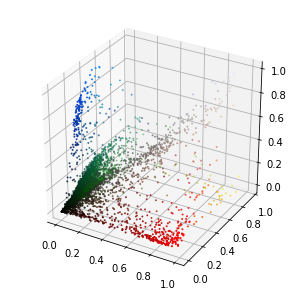

In [90]:
import mpl_toolkits.mplot3d
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(1,1,1, projection = '3d')
ax.scatter(cols[:,0],cols[:,1], cols[:,2], s = 1, c = cols)
plt.show()

In [92]:
from sklearn.mixture import GaussianMixture

In [1]:
class ColorQuantizer:
    
    def __init__ (self, n_colors = 10):
        self.model = GaussianMixture(n_components= n_colors)
        
    def fit (self, image):
        self.model.fit(colors(image))
        return self.model.means_
    
    def predict (self, image):
        labels = self.model.predict(colors(image))
        new_colors = self.model.means_[labels]
        return to_image(new_colors.reshape(*image.size[::-1], 3))

In [114]:
quantizer = ColorQuantizer()
qcols = quantizer.fit(thumb)
swatches(hsv_sorted(qcols))

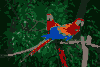

In [125]:
quantizer.predict(thumb)

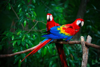

In [124]:
thumb

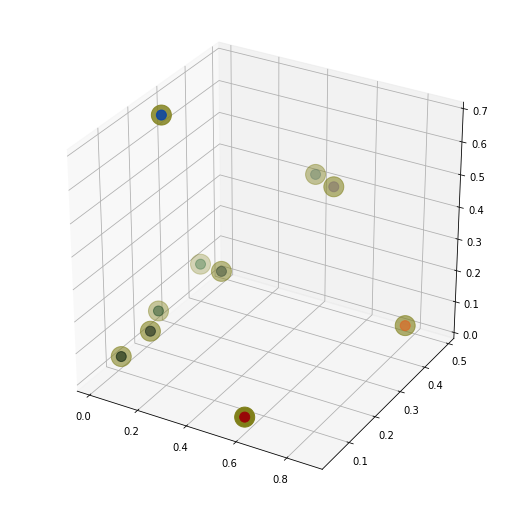

In [119]:
fig = plt.figure(figsize=(9,9))
ax = fig.add_subplot(1,1,1, projection = '3d')
ax.scatter(qcols[:,0],qcols[:,1], qcols[:,2], s = 400, c = (0.5,0.5,0.1))
ax.scatter(qcols[:,0],qcols[:,1], qcols[:,2], s = 100, c = qcols)
plt.show()